In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

digits.data.shape # 샘플수 1797, 변수 64개(8*8 픽셀)

digits.data[0]
# 1차원 데이터

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

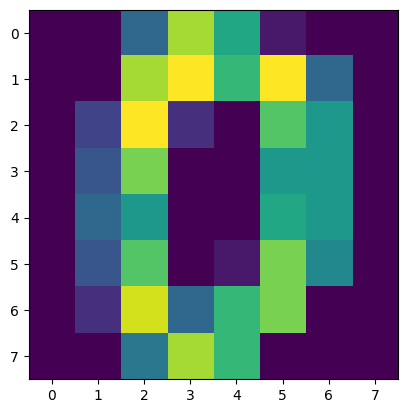

In [2]:
import matplotlib.pyplot as plt
# imshow : imageshow (이미지 출력 함수)
plt.imshow(digits.data[0].reshape(8,8))

In [3]:
from sklearn.cluster import KMeans

# 비슷한 위치의 좌표들이 초기 중심좌표로 설정될 경우 불안정한 군집화 학습이 진행됨
# 최적의 초기 중심좌표들을 설정하려는 연구들이 많이 진행되었음
# 처음 1개의 좌표를 랜덤으로 선택
# 이후의 중심좌표는 이전에 선택한 중심좌표와의 거리를 계산하여 되도록 멀리 떨어진 좌표를 중심좌표로 선택
# init : 중심좌표 선택 → k-means++ 기본값, random 랜덤으로 선택

model = KMeans(init="k-means++", n_clusters=10, random_state=0)
# fit : 학습
model.fit(digits.data)
y_pred = model.labels_
print(model.cluster_centers_) # 중심좌표

[[ 0.00000000e+00  9.22651934e-01  1.01104972e+01  1.44751381e+01
   7.86740331e+00  1.06077348e+00 -6.66133815e-16  0.00000000e+00
   2.20994475e-02  5.21546961e+00  1.36464088e+01  1.25856354e+01
   1.16464088e+01  3.37016575e+00  2.20994475e-02  0.00000000e+00
   1.10497238e-02  4.49723757e+00  8.08839779e+00  6.06629834e+00
   1.21049724e+01  3.71823204e+00  3.86740331e-02 -2.08166817e-17
   0.00000000e+00  9.39226519e-01  2.81767956e+00  7.00000000e+00
   1.25138122e+01  2.76243094e+00  6.07734807e-02  0.00000000e+00
   0.00000000e+00  4.41988950e-02  1.59668508e+00  9.86187845e+00
   1.08342541e+01  1.59668508e+00  4.44089210e-16  0.00000000e+00
   0.00000000e+00  2.43093923e-01  4.41988950e+00  1.11325967e+01
   7.75138122e+00  2.60220994e+00  9.39226519e-01  1.10497238e-02
   3.46944695e-18  1.18232044e+00  1.08950276e+01  1.36298343e+01
   1.18618785e+01  1.12486188e+01  7.60220994e+00  1.09392265e+00
   0.00000000e+00  9.17127072e-01  1.03093923e+01  1.45027624e+01
   1.35082

In [4]:
import matplotlib.pyplot as plt

def show_digits(images, labels):
    f = plt.figure(figsize=(8,2)) # 가로 8, 세로 2
    i = 0
    while(i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i+1) # 행, 열, 그림번호
        # 이미지 출력
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.set_title(labels[i])
        # x좌표 눈금
        ax.xaxis.set_ticks([])
        # y좌표 눈금
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1
        
def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)

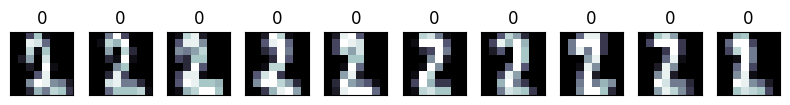

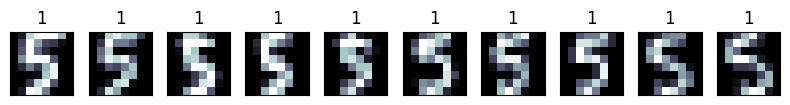

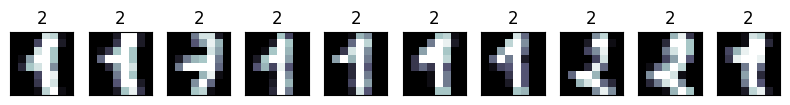

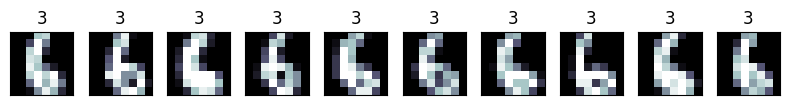

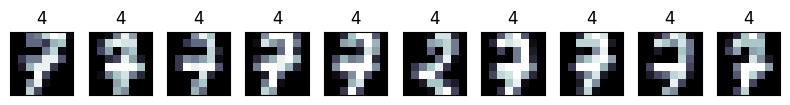

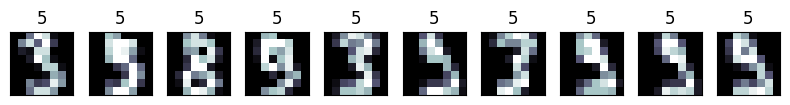

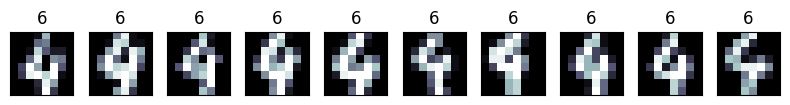

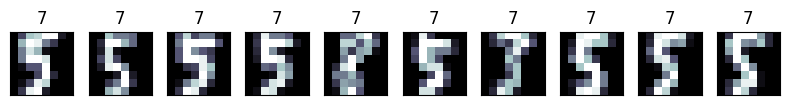

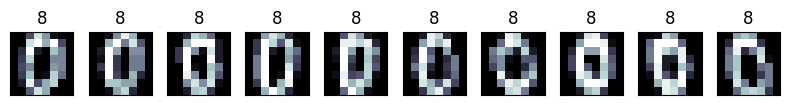

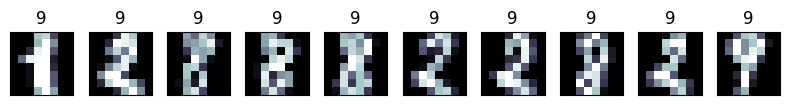

In [5]:
for i in range(10): # 0 ~ 9
    show_cluster(digits.images, y_pred, i)

# 이미지 위의 숫자는 군집번호이므로 실제 번호와 일치하지 않음 

In [6]:
from sklearn.metrics import confusion_matrix

confusion_matrix(digits.target, y_pred)

array([[  0,   0,   0,   0,   0,   0,   1,   0, 177,   0],
       [ 25,   0,  55,   2,   0,   0,   0,   1,   0,  99],
       [151,   0,   2,   0,   3,  12,   0,   0,   1,   8],
       [  1,   3,   0,   0,   6, 163,   0,   2,   0,   8],
       [  0,   0,   5,   0,   8,   0, 164,   1,   0,   3],
       [  0, 103,   0,   1,   0,   5,   1,  72,   0,   0],
       [  0,   0,   1, 177,   0,   0,   0,   0,   1,   2],
       [  0,   0,   2,   0, 175,   0,   0,   0,   0,   2],
       [  4,   1,   6,   2,   6,  48,   0,   6,   1, 100],
       [  0,   1,  21,   0,   8, 144,   0,   4,   0,   2]], dtype=int64)

In [7]:
# silhouette_score : 군집이 얼마나 잘 되어있는지 (1에 가까울 수록 잘되었다는 뜻)
from sklearn.metrics.cluster import silhouette_score

silhouette_score(digits.data, y_pred)

0.18555026309037873

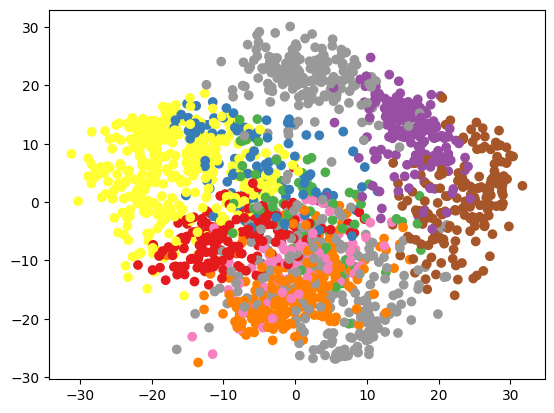

In [8]:
# 군집화 결과를 주성분 분석을 통해 그린 그래프
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(digits.data)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Set1)
plt.show()